# World Museum Analysis

## Overall project objectives
Visiting museums is an important part of travel, but it may involve lots of time and effort to figure out which museum to visit for travelers with diverse preference. Targeting at various traveler groups, we decided to provide recommendation of museums, both located in U.S. and across the world. We will perform analysis based on museums’ distribution, ratings, tags, target traveler types, etc. for recommendation purpose. Second, we will explore the relationship between museums rating and country GDP. In addition, we will perform sentiment analysis on the reviews to calculate the positive and negative review percentage for each museum, and figure out whether it is correlated with the museum’s rating, to see if museum ratings are true reflectors of quality(popularity) of the museum. 

We used the review counts as the indication of popularity and the rating as the indication of museum quality.

Our first goal is provide suggestion to administration of museums about improve the museum quality and popularity. The other goal is provide recommendation to travelers who are planning to visit museums.


## Description of The Data
Our dataset includes multiple DataFrames - categories for museums in US, categories for museums in world, museum_tags, review_content of museums in US, review_content of museums in world, tripadvisor_museum_world, and tripadvisor_museum_US. 

In the categories DataFrame, we have 65 categories which describe each aspect of museums, from exhibition types to architecture styles. Museums tags DataFrame has 9 tags mapped to museums, which includes- gift shop, all ages, rainy day, etc. Review content of museums contains lists of reviews posted by tripadvisor users. tripadvisor_museum_world contains detailed information from 671 museums across the world. This dataframe has columns like museum names, original index, location information, country name, rating, etc. In tripadvisor_museum_US, we have detailed information from 1,013 museums. In addition to the existing information, we have added - state ‘abbreviation’ column by extracting abbreviation text from Address column, - ‘state region’ column by filtering on the state ‘abbreviation’ column with created filter of east, west, middle regions, and converted data type in rating and ReviewCount as integer for our future analysis.

## Direction
### I. Descriptive Analysis Part:
We performed analysis on the following questions:

1. The relationship between  popularity  and  quality of museums in US and in the world?
2. What factors are making a museum popularity?
3. What museum administration should do to improve the popularity and the quality of museums ?
4. Is visiting museums an important part of trip for overseas travelers?
5. Does high income countries tend to have high-quality museums?
6. What kind of sentiments are expressed in the reviews? And what story do reviews tell us about the museums  ?
7. List of Museum Recommendations for travelers !
8. What is the most frequency review words in top and bottom museums?

We used the count of reviews and rating as the index of popularity and quantity, because these information are important for our next step analysis.

### II. Sentiment Analysis (NLP) and Correlation Analysis Part

We performed sentiment analysis on the reviews to calculate the positive and negative words percentage for top and bottom museum, figure out the frequency of negative words and positive words' relationship with musum quantity. 

### III. Recommendation Part

We created a recommendation system which allowing traverlers to input value(like state, Fee and trip type) to filter a list of museums recommend for them. We applied k-mode(categorical data) clustering to cluster our dataset into 4 clusters(optimal). And making recommendation based on clusters.

## Part One Data Pre-Processing & Cleaning 

1. Import Data of US museums and World museums from json file (Phase I )
<br>
   Example: 
<br>
   museum_tags=pd.read_json(path+'museum_tags.json',lines=True)

2. Data cleaning, adding columns, concatenating dataframes and re_shaping data (Phase I )
<br>
   Example:
<br>
   mn =[element for tags in museum_tags[0] for element in tags] # Museum Names extracted from museum_tags dataframe
<br>
   y = museum_tags[0].to_dict()  # Tags attached to museum tags
<br>
   tag_dict ={} # dictionary to put tags as values and Museum index as keys
<br>
   for i in mn:
<br>
      val_list = []
<br>
      for key,val in y.items():
<br>
          if i in val:
<br>
            val_list.append(key)
<br>
            tag_dict[i] = val_list
<br>
   tag_df.reset_index(inplace= True)
<br>
   tag_df.drop('Tags',axis=1, inplace= True)
<br>
   tag_df['Total_Number_of_Tags'] = tag_df.iloc[:,2:].sum(axis=1)
<br>
   tag_df.to_csv('tag.csv')
<br>
3. Scrape data of states information and continent information (Phase II )
<br>
   Example:
<br>
   url='https://simple.wikipedia.org/wiki/List_of_European_countries'
<br>
   df=pd.read_html(url, header =[0])[0]
<br>
4. Scrape worldbank website using wbdata package to get the information of country GDP and tourist arrival (Phase II )
   Example:
<br>
   #import wbdata library
<br>
   import wbdata
<br>
   #search world bank data for international tourism
<br>
   wbdata.search_indicators('international tourism')
<br>
(For more information, please refer to project progress report.)


## Data preprocess
For better analysis, we make some change to the world and US dataset from phase We added continent column to world dataset for better analysis the geography distribution of high quality museums. For US dataset, we added rank of Family, Couple, Solo, Business and Friends.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [32]:
#import the Tourist Advisor museums US and World data set we created in phase 1
us=pd.read_csv('TA_museum_USonly.csv')
world=pd.read_csv('wb_TA_museum_world.csv')

In [33]:
#Create function to convert string to numerical data
import functools 
def string_to_num(stri):
#convert string in to number, e.g. 1,354 --> 1345'''
    stri= int(stri.replace(',', ''))
    return stri
#convert data type of ReviewCount column from string to int
xx=world['ReviewCount']
rc=[]
for i in range(0,len(xx)):
    type_us=string_to_num(xx[i])
    rc.append(type_us)
rc
world['ReviewCount']=rc
#convert data type of TotalThingsToDo column from string to int
xx=world['TotalThingsToDo']
rc=[]
for i in range(0,len(xx)):
    type_us=string_to_num(xx[i])
    rc.append(type_us)
rc
world['TotalThingsToDo']=rc

In [14]:
#Add the continent column for the world dataset
#scrape European countries list
url='https://simple.wikipedia.org/wiki/List_of_European_countries'
df_Eu=pd.read_html(url, header =[0])[0]
df_Eu.rename(columns={'Name of regiona[›] andterritory, with flag':'Country'}, inplace=True)

In [16]:
#revise the format of country column 
import warnings
warnings.filterwarnings('ignore')
df_Eu['Country']=df_Eu['Country'].str.replace('[[›]]', '')
df_Eu['Country']=df_Eu['Country'].str.replace('[[[a]]', '')
df_Eu['Country']=df_Eu['Country'].str.replace('[', '')
df_European=df_Eu['Country']
df_European.iloc[15]='France'

In [17]:
#scrape African countries list
url2='https://en.wikipedia.org/wiki/List_of_African_countries_by_population'
df_Africa=pd.read_html(url2, header =[0])[0]
#revise the format of country column 
df_Africa['Country(or dependent territory)']=df_Africa['Country(or dependent territory)'].str.replace('\[\{1-2}\]', '')
df_Africa['Country(or dependent territory)']=df_Africa['Country(or dependent territory)'].str.replace('[', '')

In [18]:
#scrape North American countries list
url3='https://en.wikipedia.org/wiki/List_of_North_American_countries_by_population'
df_NA=pd.read_html(url3, header =[0])[1]
#revise the format of country column
df_NA['Country(or dependent territory)']=df_NA['Country(or dependent territory)'].str.replace('[[4]]', '')
df_NA['Country(or dependent territory)']=df_NA['Country(or dependent territory)'].str.replace('[(US)[]', '')
df_NA=df_NA['Country(or dependent territory)']

In [19]:
#scrape Oceanian countries list
url4='https://en.wikipedia.org/wiki/List_of_Oceanian_countries_by_population'
df_Ocean=pd.read_html(url4, header =[0])[0]
df_Ocean=df_Ocean['Country(or dependent territory)']

In [20]:
#scrape South_American countries list
url5='https://en.wikipedia.org/wiki/List_of_South_American_countries_by_population'
df_SA=pd.read_html(url5, header =[0])[0]
df_SA=df_SA['Country(or dependent territory)']

In [21]:
#scrape Asia countries list
url6='https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area'
df_Asia=pd.read_html(url6, header =[0])[1]
df_Asia['Country']=df_Asia['Country'].str.replace('*', '')
df_Asia['Country']=df_Asia['Country'].str.replace('[[2]]', '')
df_Asia['Country']=df_Asia['Country'].str.replace('[', '')

In [44]:
#add the group of state to dataframe
world.loc[world['Country Name'].isin(df_European),'continent']='Europe'
world.loc[world['Country Name'].isin(df_Africa),'continent']='Africa'
world.loc[world['Country Name'].isin(df_NA),'continent']='North American'
world.loc[world['Country Name'].isin(df_Ocean),'continent']='Oceanian'
world.loc[world['Country Name'].isin(df_SA),'continent']='South American'
world.loc[world['Country Name'].isin(df_Asia['Country']),'continent']='Asia'
#match country which have different name in scrape dataframe and world dataset
world[world['continent'].isnull()]['Country Name'].unique()
world.loc[world['Country Name']=='Russian Federation','continent']='Europe'
world.loc[world['Country Name']=='Portugal','continent']='Europe'
world.loc[world['Country Name']=='Korea, Rep.','continent']='Asia'
world.loc[world['Country Name']=='South Africa','continent']='Africa'
world.loc[world['Country Name']=='Slovak Republic','continent']='Europe'
world.loc[world['Country Name']=='Serbia','continent']='Europe'
world.loc[world['Country Name']=='Morocco','continent']='South American'
world.loc[world['Country Name']=='Egypt, Arab Rep.','continent']='Africa'
world.loc[world['Country Name']=='Taiwan, China','continent']='Asia'
world.loc[world['Country Name']=='Bahamas, The','continent']='North American'
world.loc[world['Country Name']=='Kenya','continent']='Africa'
world.loc[world['Country Name']=='Netherlands','continent']='Europe'
world.loc[world['Country Name']=='Curacao','continent']='South American'
world['Fee']=world['Fee'].str.replace(' ', '')
us['Fee']=us['Fee'].str.strip(' ')
world=world.drop(['Unnamed: 0'], axis=1)
#Get the updated world dataset
world.head()

,MuseumName,index,Address,FeatureCount,Fee,Langtitude,Latitude,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo,Abbrevation,Country Name,continent
0,The Third Man Museum,358,Pressgasse | Main Entrance Corner Pressgasse /...,0,Yes,16.363958,48.197363,+43 1 5864872,16,5.0,369,513,AUT,Austria,Europe
1,Budapest Pinball Museum,628,"Radnoti Miklos utca, Budapest, Hungary",0,Yes,19.054343,47.514560,+36 30 900 6091,12,5.0,560,415,HUN,Hungary,Europe
2,Croke Park Stadium Tour & GAA Museum,962,"St Josephs Avenue | Drumcondra, Dublin cod3, I...",2,Yes,NaN,NaN,+353 1 819 2323,5,5.0,1835,480,IRL,Ireland,Europe
3,Israel Museum,180,"Givat Ram | Ruppin Rd., Jerusalem, Israel",3,Yes,35.203228,31.776221,972 2 6708811,4,5.0,2769,288,ISR,Israel,Asia
4,State Hermitage Museum and Winter Palace,55,"Dvortsovaya Square,, St. Petersburg, Russia",8,Yes,30.331431,59.946540,+7 (812) 710-90-79,2,5.0,14695,1595,RUS,Russian Federation,Europe


In [34]:
#Add museum type rank based on review types
#5 columns 'Families_rank','Couples_rank','Business_rank','friends_rank','solo_rank')
us.loc[us['Families']>100,'Families_rank']='Family friendly'
us.loc[us['Families']<100,'Families_rank']='Family less '

us.loc[us['Couples']>100,'Couples_rank']='Couples friendly'
us.loc[us['Couples']<100,'Couples_rank']='Couples less '

us.loc[us['Solo']>100,'solo_rank']='solo friendly'
us.loc[us['Solo']<100,'solo_rank']='solo less'

us.loc[us['Business']>100,'Business_rank']='Business friendly'
us.loc[us['Business']<100,'Business_rank']='Business less '

us.loc[us['Friends']>100,'friends_rank']='friends friendly'
us.loc[us['Friends']<100,'friends_rank']='friends less '

us=us.drop(['Unnamed: 0'], axis=1)

In [36]:
us.head()

,Address,FeatureCount,Fee,Langtitude,Latitude,Museum_Names,PhoneNum,Rank,ReviewCount,TotalThingsToDo,...,Couples,Solo,Business,Friends,State_Region,Families_rank,Couples_rank,solo_rank,Business_rank,friends_rank
0,"555 Pennsylvania Ave NW, Washington DC, DC",3,Yes,-77.019235,38.893138,Newseum,+1 888-639-7386,8,6309,398,...,1524.0,425.0,363.0,871.0,East,Family friendly,Couples friendly,solo friendly,Business friendly,friends friendly
1,"1000th Ave, New York City, NY",12,Yes,-73.962928,40.779166,The Metropolitan Museum of Art,1 212-535-7710,2,36627,1028,...,6264.0,2131.0,638.0,3782.0,East,Family friendly,Couples friendly,solo friendly,Business friendly,friends friendly
2,"945 Magazine Street, New Orleans, LA",11,Yes,-90.070086,29.943004,The National WWII Museum,+1 504-528-1944,1,15611,319,...,6224.0,822.0,774.0,2419.0,Middle,Family friendly,Couples friendly,solo friendly,Business friendly,friends friendly
3,"2001 N Colorado Blvd, Denver, CO",0,Yes,-104.941020,39.769189,Denver Museum of Nature & Science,303-370-6000,4,2564,231,...,467.0,137.0,74.0,291.0,West,Family friendly,Couples friendly,solo friendly,Business less,friends friendly
4,"111 S Michigan Ave, Chicago, IL",5,Yes,-87.623724,41.879547,Art Institute of Chicago,312 443 3600,1,15532,614,...,4064.0,1421.0,829.0,2452.0,Middle,Family friendly,Couples friendly,solo friendly,Business friendly,friends friendly


### Analysis of museums in USA and the world


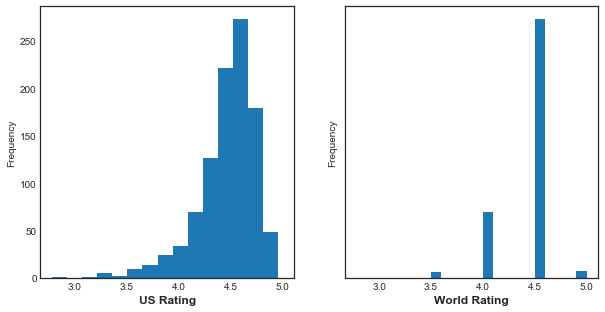

In [40]:
#the histogram of Rating distribution of world and US
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))
us['Rating'].plot.hist(bins=15, ax=ax[0])
world['Rating'].plot.hist(bins=15, ax=ax[1])
ax[0].set_xlabel('US Rating', fontweight='bold', fontsize=12)
ax[1].set_yticklabels('')
ax[1].set_xlabel('World Rating', fontweight='bold', fontsize=12);


We compared the distribution of musemus of museums in US and museums in world(expect US). Because in the original data set, the US Rating has two digital but World Rating only has one digital, distribution plots might look different. However, the distribution of these two part are generally following the same distribution.

Text(0.5,0,'ReviewCount')

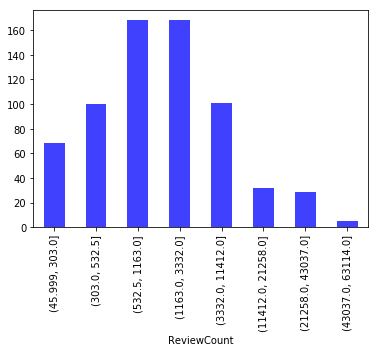

In [9]:
#The distribution of review count of world museums
l=pd.qcut(world['ReviewCount'],[0,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1]).value_counts().sort_index().plot(kind='bar',alpha=0.75,color='b')
l.set_xlabel("ReviewCount")

***The distribution of museum review count. We can see the majority of review count clusted in range from 532.3 to 3332.***

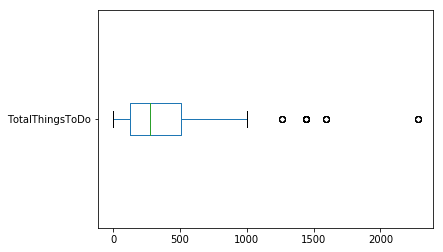

In [38]:
#The distribution of 'total things to do'
world['TotalThingsToDo'].plot.box(vert=False)

In [47]:
# Heatmap of the rating and review counts divided by fee 
# Pivot table of rating's relationship with fee and continent column
world.head()
table_avg_rating = world.pivot_table(index='continent', columns='Fee', values='Rating', aggfunc='mean', fill_value=0)
table_count = world.pivot_table(index='continent', columns='Fee', values='Rating', aggfunc='count', fill_value=0)

Text(0.5,0.98,'The average rating and review counts by Fee and region of world')

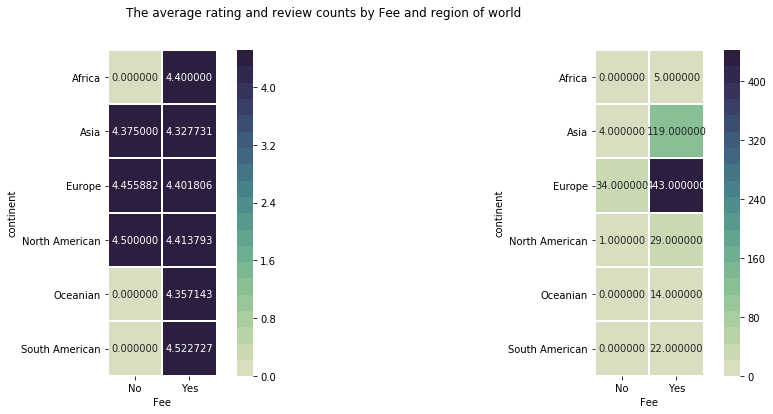

In [48]:
# Heatmap of the rating and review counts divided by fee 
fig, ax = plt.subplots(1, 2, sharex=True,figsize=(16, 6))
sns.heatmap(table_avg_rating, cmap=sns.cubehelix_palette(20, start=.5, rot=-.75), annot=True, fmt='f', square=True, linewidths=1, ax=ax[0]);
sns.heatmap(table_count, cmap=sns.cubehelix_palette(20, start=.5, rot=-.75), annot=True, fmt='f', square=True, linewidths=1, ax=ax[1]);
fig.suptitle('The average rating and review counts by Fee and region of world')

***The free museum in North American has the highest average rating, museums with admission fee in south American have the highest average rating. The museums in Eurpoe have the highest fee review counts.***

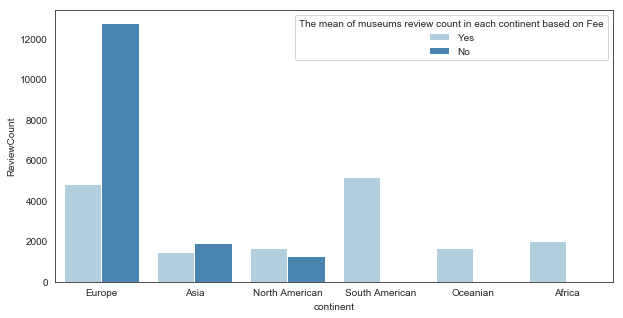

In [49]:
#The distribution of review counts in each continent based on fee
plt.figure(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='continent', y='ReviewCount', hue='Fee', data=world, palette='Blues', ci=None, estimator=np.mean).legend(frameon=True, title='Cut', loc='upper right', prop={'size': 10}).set_title("The mean of museums review count in each continent based on Fee")

**We found several interesting things from this plot.**

In Eurpoe, Asia and North American, free museums have more reviews than museums with admission. In South American, Oceanian and Africa, museums with admission have more reviews. Considering none of museums in these continents are free in the data set, it is not a surprise that we do not have any reviews of free museums in these area.

Even through there are only one free museum in North American (except USA), its review count is higher than the average review count for museums with admission. This indicted that the free museums in this area might be more popular than other museums. 

In Europe, a continent with the highest number of museums, museums with admission has more average review counts than free museums in these area. But compared with museums around the world which with admission or without admission, free museums still have high level of review counts. It indicated that in the average level, museums in Eurpoean are enjoying the highest popularity. 

In [50]:
pd.set_option('display.max_columns', 500)

***In previous analysis, we look at the current top popular museums in the world, but we also found that some top museums are not so popular. Thus, we will explore this problem by comparing the categories of each museums.***


In [51]:
world.sort_values(by= ['Rating','Rank'],ascending=False,  inplace=True)
top10=world[:11]
#sort top museums by reviewCount
top10.sort_values(by= ['ReviewCount'],ascending=False)

,MuseumName,index,Address,FeatureCount,Fee,Langtitude,Latitude,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo,Abbrevation,Country Name,continent
4,State Hermitage Museum and Winter Palace,55,"Dvortsovaya Square,, St. Petersburg, Russia",8,Yes,30.331431,59.946540,+7 (812) 710-90-79,2,5.0,14695,1595,RUS,Russian Federation,Europe
8,National Museum of Anthropology (Museo Naciona...,36,Avenida Paseo de la Reforma | Chapultepec Pola...,6,Yes,-99.200245,19.427238,05 553 6266,1,5.0,10557,463,MEX,Mexico,North American
5,Yad Vashem - Holocaust Memorial,326,"Mount of Remembrance | Mount Herzl, Jerusalem,...",4,Yes,NaN,NaN,+972-26443400,2,5.0,5183,288,ISR,Israel,Asia
9,Mercedes-Benz Museum,41,"Mercedesstrasse, Stuttgart, Baden-Wurttemberg,...",0,Yes,9.233762,48.788350,490 711 17 30 000,1,5.0,4589,129,DEU,Germany,Europe
3,Israel Museum,180,"Givat Ram | Ruppin Rd., Jerusalem, Israel",3,Yes,35.203228,31.776221,972 2 6708811,4,5.0,2769,288,ISR,Israel,Asia
2,Croke Park Stadium Tour & GAA Museum,962,"St Josephs Avenue | Drumcondra, Dublin cod3, I...",2,Yes,NaN,NaN,+353 1 819 2323,5,5.0,1835,480,IRL,Ireland,Europe
10,Royal Tyrrell Museum,298,1500 North Dinosaur Trail | Midland Provincial...,0,Yes,-112.710534,51.465185,14038237707,1,5.0,1823,28,CAN,Canada,North American
6,Museo del Vidrio y Cristal de Malaga,530,Plaza Santisimo Cristo de La Sa | Frente a la ...,1,Yes,-4.421746,36.725973,+34 952 22 02 71,2,5.0,1181,191,ESP,Spain,Europe
1,Budapest Pinball Museum,628,"Radnoti Miklos utca, Budapest, Hungary",0,Yes,19.054343,47.514560,+36 30 900 6091,12,5.0,560,415,HUN,Hungary,Europe
0,The Third Man Museum,358,Pressgasse | Main Entrance Corner Pressgasse /...,0,Yes,16.363958,48.197363,+43 1 5864872,16,5.0,369,513,AUT,Austria,Europe


#### The distribution of review count for museums outside US
since we have already got the plot of rating distribution of rating, let's do some analysis on review count. We analysis review count because it is an significaten index to measure the popularity of a museum. 

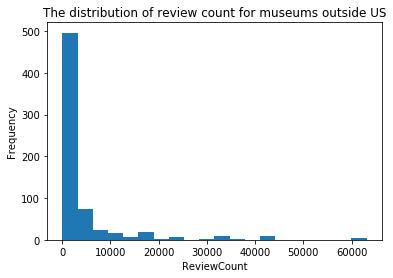

In [27]:
#pint the histogram of Rating distribution
plt.hist(world['ReviewCount'], bins=20)
plt.xlabel('ReviewCount')
plt.ylabel('Frequency')
plt.title('The distribution of review count for museums outside US');
# Create figure with suplots

In [15]:
#Add the popular tag for top museums
df.loc[df['ReviewCount']>1000,'popular']='Yes'
df.loc[df['ReviewCount']<1000,'popular']='No'

***We sorted the information of top museums by the review count as the index of popularity. We found out that the for museums with relative high number of reviews (above 2000), they have audio guide tag. But these museums with high score but lower count of reviews do not have this tags. The Museo del Vidrio y Cristal de Malaga has more than 1000 review count. It also have guided tour. In museums without guide information, their reviews counts are lower. In conclusion, a museum can improve its popularity by providing guide serive, because people need more knowledge and backgroud information to fully understand the meaning behind each exhibitors.
For the categories part, all of the top museums are Specialty Museums expect 'Yad Vashem - Holocaust Memorial' which is a museum and a library. 
We also found out the most popular museum in the top museums is National Museum of Anthropology.
4 of the 7 museums are located in Europe, 2 in Asia amd 1 in North American.***


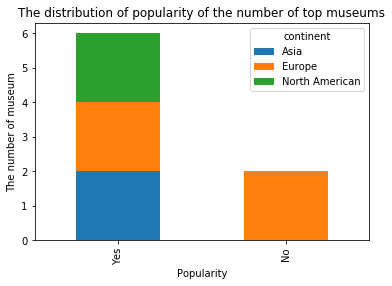

In [16]:
# the distribution of top museums of the world
pd.crosstab(index=df.popular, columns=df.continent).loc[['Yes','No']].plot(kind='bar', stacked=True)#stacked should be false
plt.xlabel('Popularity')
plt.ylabel('The number of museum')
plt.title('The distribution of popularity of the number of top museums');

From the plot, we found out some interesting phenomenon. Half of the top museums are located in Eurpoe, but half of them are not so popular (with less than 1000 reviews) museums. There two "not so popular" museums are Jet Age Museum and Budapest Pinball Museum. We think these two museums may only have sepcific tourists. For example, Budapest Pinball Museum may be more attractive to pinball lover than general public. Thus, they might be not as popular as the other musums which have more popular topic like Anthropology.

In [52]:
#Create a map of the distribution of museums in US
import os
import folium
state_geo = os.path.join('us-states.json')
us_museum = pd.read_csv('TA_museum_USonly.csv')
state_rating = pd.DataFrame(round(us_museum['Rating'].groupby(by=us_museum['State']).mean(),2))
state_rating.to_csv('state_rating.csv', header=True, index=True)
state_rating = os.path.join('state_rating.csv')
rating_data = pd.read_csv(state_rating)
m = folium.Map(location=[37, -102], zoom_start=5)
m.choropleth(geo_data=state_geo, name='choropleth', data=rating_data, columns=['State','Rating'], key_on='feature.id', fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2, legend_name='State Average Rating')
folium.LayerControl().add_to(m)
m

In this map, the darker the color, the higher average rating of museums in that state. According to the map, North Dakata, Montana, New Jersey, Indiana and Wyaming have the highest museum quality. Traverlers can direct find the museum quality of each state in this map. And museums lovers can plan their trip using this map as reference.

### Analysis of fee, rating, reviewcount and region for museums in US

Text(0.5,0.98,'The average rating and review counts based on Fee and region')

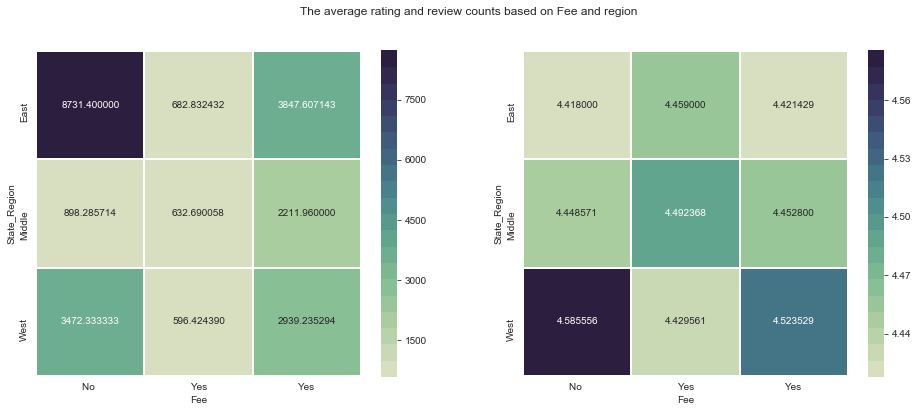

In [53]:
# Pivot table of rating's relationship with fee and continent column
table_avg_rating = us.pivot_table(index='State_Region', columns='Fee', values='Rating', aggfunc='mean', fill_value=0)
table_avg_reviewcount = us.pivot_table(index='State_Region', columns='Fee', values='ReviewCount', aggfunc='mean', fill_value=0)
# Heatmap
fig, ax = plt.subplots(1, 2, sharex=True,figsize=(16, 6))
sns.heatmap(table_avg_reviewcount, cmap=sns.cubehelix_palette(20, start=.5, rot=-.75), annot=True, fmt='f', square=True, linewidths=1, ax=ax[0]);
sns.heatmap(table_avg_rating, cmap=sns.cubehelix_palette(20, start=.5, rot=-.75), annot=True, fmt='f', square=True, linewidths=1, ax=ax[1]);
fig.suptitle('The average rating and review counts based on Fee and region')

***The right heatmap shows that museums in West region without admission fee have the highest average rating score. Museums in east without admission fee have the lowest score.
The left heatmap shows that museums in east region without admission fee have the highest average review counts. It indicted that reviews count may not have positive correlation with rating. It makes sense since people writing reviews may give negative and positive recommendation.***

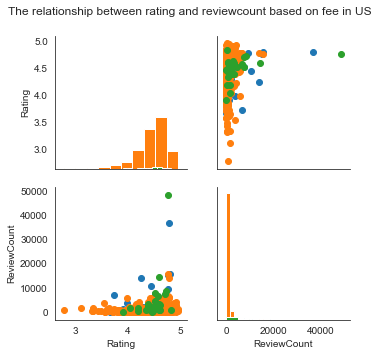

In [54]:
# The relationship between rating and reviewcount based on fee for museums in US
g = sns.PairGrid(us, vars=['Rating','ReviewCount'], hue='Fee')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('The relationship between rating and reviewcount based on fee in US');

**Plots shows that there are no strong relationship between popularity (reviewcount) and rating. It also shows that in US, the number of musumes with admission fee is more than the numebr of museums without fee.**

### Analysis on popularity based on rating and review type for museums in US

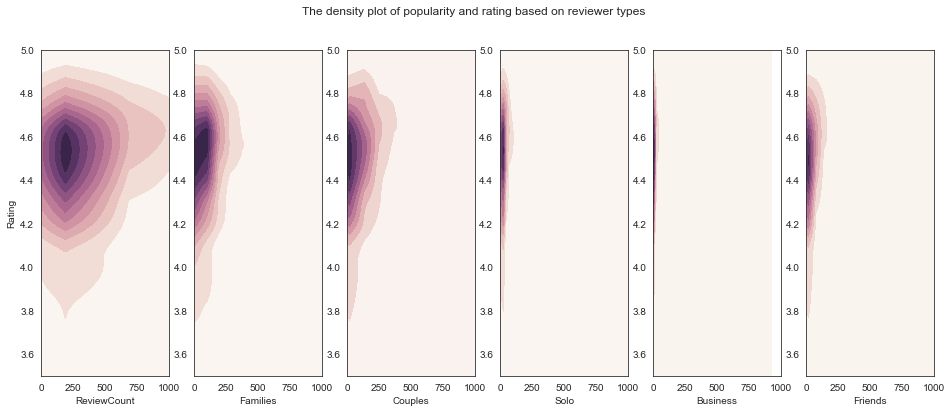

In [56]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(1, 6, sharex=True,figsize=(16, 6))
sns.kdeplot(us['ReviewCount'],us['Rating'], color="#4CB391",cmap=cmap, ax=ax[0],shade=True)
sns.kdeplot(us['Families'],us['Rating'], color="#4CB391",cmap=cmap, ax=ax[1],shade=True)
sns.kdeplot(us['Couples'],us['Rating'], color="#4CB391",cmap=cmap, ax=ax[2],shade=True)
sns.kdeplot(us['Solo'],us['Rating'], color="#4CB391",cmap=cmap, ax=ax[3],shade=True)
sns.kdeplot(us['Business'],us['Rating'], color="#4CB391",cmap=cmap, ax=ax[4],shade=True)
sns.kdeplot(us['Friends'],us['Rating'], color="#4CB391",cmap=cmap, ax=ax[5],shade=True)
ax[0].set_xlim([0, 2500])
ax[0].set_ylim([3.5,5])
ax[1].set_xlim([0, 1000])
ax[1].set_ylim([3.5,5])
ax[2].set_xlim([0, 1000])
ax[2].set_ylim([3.5,5])
ax[3].set_xlim([0, 1000])
ax[3].set_ylim([3.5,5])
ax[4].set_xlim([0, 700])
ax[4].set_ylim([3.5,5])
ax[5].set_xlim([0, 1000])
ax[5].set_ylim([3.5,5])
ax[1].set_ylabel('')
ax[2].set_ylabel('')
ax[3].set_ylabel('')
ax[4].set_ylabel('')
ax[5].set_ylabel('')
fig.suptitle('The density plot of popularity and rating based on reviewer types');

**The plot shows that the distribution of the count of reviews and rating rate. We can see that the majority pair of rating range and review counts are lustered at rating from 4.3 to 4.7 and review counts beween 0 to 500. 
This graph does not show great corelation between the review counts and rating. 
we also have density plot of the number of certain review tags( families, couples, solo, business and family) and their rating range. By comparing the five plots, we found of all types of travelers whom wrote reviews, more reviews are from families travelers and couples travelers than from solo traverlers, business travelers and friends. We can get the conclusion that museums which are family friendly and couple friendly may got more review counts. And more review counts will increase museums' popularity.**



Text(0.5,1,'The average scores of museums based on region and tag')

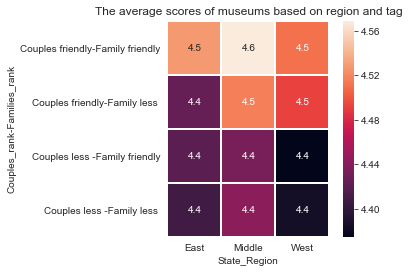

In [57]:
# Heatmap of average rating scores of museums based on region for museums in US
plt.figure(figsize=(5,8))
table = us.pivot_table(index=('Couples_rank','Families_rank'), columns='State_Region', values='Rating', aggfunc='mean',fill_value=0)
sns.heatmap(table, mask =table < 1, annot=True, square=True, linewidths=1)
plt.subplots_adjust(top=0.5)
plt.title('The average scores of museums based on region and tag')

**In this plot, we analysis museums in different region. The heatmap shows states in middle region have the highest rate of couple friendly and family friendly museums.
According to heatmap, the average of family friendly and couples friendly museums have the highest average score comparing to museums which has only one tag. And museums with only one tag has higher average score than museums have no tag.**

## Conclusion
**The distribution of rating in world museums showing the same trend. The popularity and museum quality do not have strong correlation relationship.For museums inside us, people are more likely to go to museums which are couple and family friendly. In worldwide, traverlers are prefer museums which have more general topic and providing guide service because of language and cultural difference. **

# Economics and Museums Quality
## Analysis of world museum data and world bank data

***In last part, we found out that museum quality in European countries and North American are higher than in other part of the world. So, we assumped that there might be a relationship between economic and museumss' rating and popularity. Thus,we processed this part of analysis.***

In [59]:
# import libraries
import wbdata
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy.stats.stats import pearsonr

In [60]:
# search world bank data for international tourism
wbdata.search_indicators('international tourism')
# search world bank data for GDP
wbdata.search_indicators('GDP per capita')
world_museum=pd.read_csv('TA_museum_world.csv')
world_museum.head()

ST.INT.XPND.MP.ZS	International tourism, expenditures (% of total imports)
ST.INT.XPND.CD   	International tourism, expenditures (current US$)
ST.INT.TVLX.CD   	International tourism, expenditures for travel items (current US$)
ST.INT.TVLR.CD   	International tourism, receipts for travel items (current US$)
ST.INT.TRNX.CD   	International tourism, expenditures for passenger transport items (current US$)
ST.INT.TRNR.CD   	International tourism, receipts for passenger transport items (current US$)
ST.INT.RCPT.XP.ZS	International tourism, receipts (% of total exports)
ST.INT.RCPT.CD   	International tourism, receipts (current US$)
ST.INT.DPRT      	International tourism, number of departures
ST.INT.ARVL      	International tourism, number of arrivals
6.0.GDPpc_constant        	GDP per capita, PPP (constant 2011 international $) 
FB.DPT.INSU.PC.ZS         	Deposit insurance coverage (% of GDP per capita)
NV.AGR.PCAP.KD.ZG         	Real agricultural GDP per capita growth rate (%)
NY.GDP.PCA

,Unnamed: 0,MuseumName,index,Address,FeatureCount,Fee,Langtitude,Latitude,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo,Abbrevation,Country Name
0,0,The Third Man Museum,358,Pressgasse | Main Entrance Corner Pressgasse /...,0,Yes,16.363958,48.197363,+43 1 5864872,16,5.0,369,513,NaN,Austria
1,1,Budapest Pinball Museum,628,"Radnoti Miklos utca, Budapest, Hungary",0,Yes,19.054343,47.514560,+36 30 900 6091,12,5.0,560,415,NaN,Hungary
2,2,Croke Park Stadium Tour & GAA Museum,962,"St Josephs Avenue | Drumcondra, Dublin cod3, I...",2,Yes,NaN,NaN,+353 1 819 2323,5,5.0,"1,835",480,NaN,Ireland
3,3,Israel Museum,180,"Givat Ram | Ruppin Rd., Jerusalem, Israel",3,Yes,35.203228,31.776221,972 2 6708811,4,5.0,"2,769",288,NaN,Israel
4,4,State Hermitage Museum and Winter Palace,55,"Dvortsovaya Square,, St. Petersburg, Russia",8,Yes,30.331431,59.946540,+7 (812) 710-90-79,2,5.0,"14,695","1,595",NaN,Russia


In [36]:
# define a function to get country's number of arrivals
def get_country_arr (country_abb):
    try:
        avg_arr=mean([int(i['value']) for i in wbdata.get_data('ST.INT.ARVL',country=country_abb,data_date=dates)])
    except:
        avg_arr=np.nan
    return avg_arr

In [37]:
# define a function to get country's GDP per capita
def get_gdp_cap (country_abb):
    try:
        avg_gdp=mean([float(i['value']) for i in wbdata.get_data('NY.GDP.PCAP.CD',country=country_abb,data_date=dates)])
    except:
        avg_gdp=np.nan
    return avg_gdp

In [39]:
# add new columns of Abbrevation, Average Arrivals, GDP per capita (USD) from wbdata
world_museum['Abbrevation']=world_museum['Country Name'].map(get_country_abb)
world_museum['Average Arrivals']=world_museum['Abbrevation'].map(get_country_arr)
world_museum['GDP per capita (USD)']=world_museum['Abbrevation'].map(get_gdp_cap)

In [61]:
# create time period for 5 years (2013-2017)
dates=(datetime.datetime(2013,1,1),datetime.datetime(2017,1,1))

In [63]:
# output the dataframe with added wbdata
world_museum=world_museum.drop(['Unnamed: 0'], axis=1)
world_museum.head()

,MuseumName,index,Address,FeatureCount,Fee,Langtitude,Latitude,PhoneNum,Rank,Rating,ReviewCount,TotalThingsToDo,Abbrevation,Country Name
0,The Third Man Museum,358,Pressgasse | Main Entrance Corner Pressgasse /...,0,Yes,16.363958,48.197363,+43 1 5864872,16,5.0,369,513,NaN,Austria
1,Budapest Pinball Museum,628,"Radnoti Miklos utca, Budapest, Hungary",0,Yes,19.054343,47.514560,+36 30 900 6091,12,5.0,560,415,NaN,Hungary
2,Croke Park Stadium Tour & GAA Museum,962,"St Josephs Avenue | Drumcondra, Dublin cod3, I...",2,Yes,NaN,NaN,+353 1 819 2323,5,5.0,"1,835",480,NaN,Ireland
3,Israel Museum,180,"Givat Ram | Ruppin Rd., Jerusalem, Israel",3,Yes,35.203228,31.776221,972 2 6708811,4,5.0,"2,769",288,NaN,Israel
4,State Hermitage Museum and Winter Palace,55,"Dvortsovaya Square,, St. Petersburg, Russia",8,Yes,30.331431,59.946540,+7 (812) 710-90-79,2,5.0,"14,695","1,595",NaN,Russia


### Analysis museum's significance in a trip

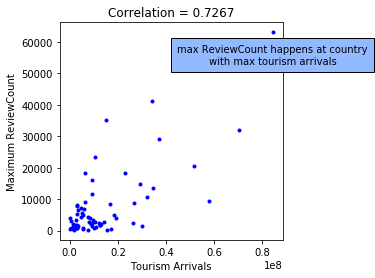

In [42]:
# 'Is visiting museums an important part of trip?' -- explore the relationship between tourism arrivals and maximum review count
avg_rc=world_museum.groupby('Abbrevation')['ReviewCount'].max()
num_arr=world_museum.groupby('Abbrevation')['Average Arrivals'].unique()
plt.figure(figsize=(4,4))
plt.plot(num_arr, avg_rc, 'b.')
plt.xlabel('Tourism Arrivals')
plt.ylabel('Maximum ReviewCount')
plt.title('Correlation = %.4f' % pearsonr(num_arr,avg_rc)[0])
plt.text(x=max(num_arr), y=53000, s='max ReviewCount happens at country\nwith max tourism arrivals', horizontalalignment='center', 
        bbox={'linestyle': '-', 'facecolor': '#93baff', 'pad': 6});

**This plot shows strong relationship between tourism arrival and reviewcounts. It means more traverlers arriving a country, the more popular museums in that country. Thus, visiting a museum is an important part of a trip. The improvement of museum rating may improve the country's tourism arrivals.**

### The relationship between museum quality and country income

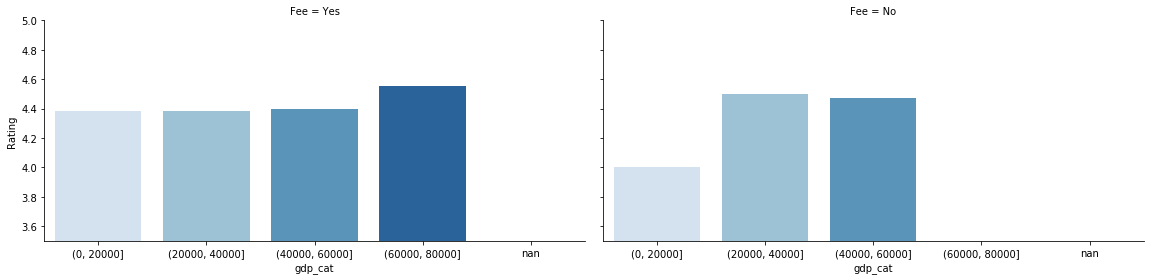

In [49]:
# 'Does high income countries tend to have high-quality museums?' -- segment by whether the museum is free or not
g = sns.FacetGrid(world_museum, col='Fee', sharey=True, height=4, aspect=2)
g.map(sns.barplot, 'gdp_cat', 'Rating', palette=sns.color_palette("Blues", 4), order=world_museum['gdp_cat'].unique().sort_values(), ci=None)
plt.ylim([3.5,5]);

**For both types of museums, museums rating shows a positive correlative relationship with the GDP, especially for free museums.**

# Analysis of reviews
Besides analysis from macroeconomics aspect, we decided to explore the reviews of top and bottom museums. 

### Data processing

In [65]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
review_content_USonly = pd.read_json('review_content_USonly.json',lines= True)
review_content_USonly= review_content_USonly.T
from textblob import TextBlob



Populating the interactive namespace from numpy and matplotlib


In [66]:
review_content_USonly.values
review_USonly = review_content_USonly.reset_index()
tripadvisor_museum_us = pd.read_csv("TA_museum_USonly.csv")
tripadvisor_museum_us.sort_values(by= ['Rating','Rank'],ascending=False,  inplace=True)
tripadvisor_museum_us.reset_index(inplace = True)
top5US = []
x = tripadvisor_museum_us["Museum_Names"][:10]
toprating = tripadvisor_museum_us["Rating"][:10]
top5US = [name for name in x]
top5US
tripadvisor_museum_us = pd.read_csv("TA_museum_USonly.csv")
tripadvisor_museum_us.sort_values(by= ['Rating','Rank'],ascending=True,  inplace=True)
tripadvisor_museum_us.reset_index(inplace = True)
bottom5US = []
x = tripadvisor_museum_us["Museum_Names"][:10]
bottomrating = tripadvisor_museum_us[:10]
#bottomrating = [rating for rating in bottomrating]
bottom5US = [name for name in x]
bottom5US 
bottomrating
reviewTop5_USonly =review_USonly.loc[review_USonly['index'].isin(top5US)]
reviewLow5_USonly =review_USonly.loc[review_USonly['index'].isin(bottom5US)]
reviewTop5_USonly=reviewTop5_USonly.rename(columns= {'index':'MuseumName',0:'Comments'})
reviewLow5_USonly=reviewLow5_USonly.rename(columns= {'index':'MuseumName',0:'Comments'})
top5Review_USonly = reviewTop5_USonly.Comments.apply(pd.Series).merge(reviewTop5_USonly, left_index = True, right_index = True).drop(["Comments"], axis = 1).melt(id_vars = ['MuseumName'], value_name = 'Comments').drop("variable", axis = 1).dropna()
bottome5Review_USonly = reviewLow5_USonly.Comments.apply(pd.Series).merge(reviewLow5_USonly, left_index = True, right_index = True).drop(["Comments"], axis = 1).melt(id_vars = ['MuseumName'], value_name = 'Comments').drop("variable", axis = 1).dropna()
# Convert text to lower case
top5Review_USonly['Comments'] = top5Review_USonly['Comments'].str.lower()
bottome5Review_USonly['Comments']= bottome5Review_USonly['Comments'].str.lower()
# Remove unnecessary punctuation
top5Review_USonly['Comments'] = top5Review_USonly['Comments'].map(lambda s : re.sub('[\n,()]', '',s))
bottome5Review_USonly['Comments']= bottome5Review_USonly['Comments'].map(lambda s : re.sub('[\n,()]', '',s))
top5Review_USonly['Blob'] = top5Review_USonly['Comments'].map(lambda s : TextBlob(s))
bottome5Review_USonly['Blob'] = bottome5Review_USonly['Comments'].map(lambda s : TextBlob(s))
top5Review_USonly['SentimentScore'] =top5Review_USonly['Blob'].map(lambda s : s.sentiment.polarity)
bottome5Review_USonly['SentimentScore'] =bottome5Review_USonly['Blob'].map(lambda s : s.sentiment.polarity)
def senti_score(x):
    s = ""
    if (x > 0):
        s = "Positive"
    else:
        s = "Negative"
    return s
top5Review_USonly['Sentiments']= top5Review_USonly['SentimentScore'].apply(senti_score)
bottome5Review_USonly['Sentiments']= bottome5Review_USonly['SentimentScore'].apply(senti_score)


tf = pd.DataFrame({'Type': "Bottom" , 'Sentiment': bottome5Review_USonly['Sentiments'], 'Sentiment-Score':bottome5Review_USonly['SentimentScore'] })
tf2 = pd.DataFrame({'Type': "Top" , 'Sentiment': top5Review_USonly['Sentiments'],'Sentiment-Score':top5Review_USonly['SentimentScore'] })
frames = [tf, tf2 ]
result = pd.concat(frames)
bottome5Review_USonly['Sentiments'].value_counts()



Positive    74
Negative     9
Name: Sentiments, dtype: int64

### The sentimental analysis of reviews

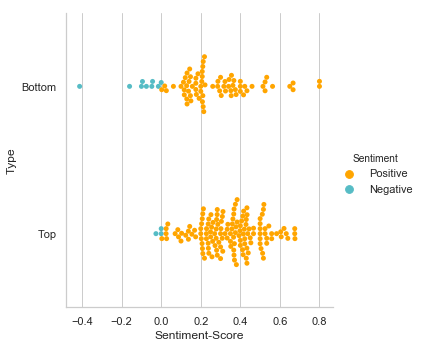

In [69]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
sns.catplot(x="Sentiment-Score",hue="Sentiment",y="Type",kind="swarm",data=result,palette=['#ffa500','#56bcc5']);

**The plot shows that for top museums, the proportion of positive reviews are higher than bottom museums. And from the range of the museum types, we can see that people are more willingly to write review for top museums than bottom museums.**

### The word cloud for each top and bottom list of museums

In [71]:
import nltk
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

In [72]:
reviews=bottome5Review_USonly.loc[0,'Comments']
words = regexp_tokenize(reviews, '[^. ]+')
words = [word for word in words if word not in stopwords.words('english') if word != "he's"]
lmtzr = WordNetLemmatizer()
words = [lmtzr.lemmatize(word) for word in words]

In [56]:
def gen_word_tokens (review):
    words = regexp_tokenize(review, '[^. ]+')
    words = [word for word in words if word not in stopwords.words('english') if word != "he's"]
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(word) for word in words]
    return words

In [57]:
bottom_cloud = [item for sublist in [review for review in bottome5Review_USonly['Comments'].map(gen_word_tokens)] for item in sublist]

In [58]:
top_cloud = [item for sublist in [review for review in top5Review_USonly['Comments'].map(gen_word_tokens)] for item in sublist]

### The world cloud of bottom 10 museums' reviews

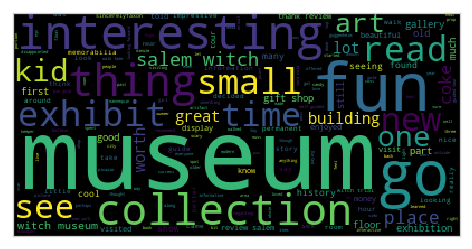

In [59]:
# Bottom Word Cloud
wc = WordCloud(background_color='black').generate(' '.join(bottom_cloud))
plt.figure(figsize=(8,8))
plt.xticks([])
plt.yticks([])
plt.imshow(wc);

### The world cloud of top 10 museums' reviews

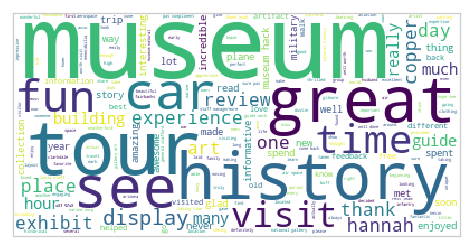

In [61]:
# Top Word Cloud
wc = WordCloud(background_color='white').generate(' '.join(top_cloud))
plt.figure(figsize=(8,8))
plt.xticks([])
plt.yticks([])
plt.imshow(wc);

### Recommendation System
We have done k-mode(categorical data) clustering to cluster our dataset into 4 clusters(optimal). We have done clustering to get focus grouping and make better museum recommendations for travellers.

In [73]:
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
# Define variables on which to cluster borrows
xc = pd.read_csv("USonly.csv")

xvars = ['Fee','State','Rating','TotalThingsToDo','ReviewCount','State_Region','Families_rank','Couples_rank','Business_rank','friends_rank','solo_rank','Rating']
xc.head()
Xc = xc[xvars]
#Xc = StandardScaler().fit_transform(Xc)
Xc = pd.DataFrame(Xc, columns=xvars)
Xc.head()
categories = ['Fee','State','State_Region','Families_rank','Couples_rank','Business_rank','friends_rank','solo_rank','Rating']
km = KModes(n_clusters=4, init='Huang', n_init=100, verbose=0)

clusters = km.fit_predict(Xc)

Xc['Clusters']=km.labels_
xc['Clusters']=km.labels_

#### GUI Application to get input from the users and store the input value to Filter out the reult in jupyter notebook

In [74]:
from tkinter import *

def show_entry_fields():
    global Fee 
    global State 
    global State_Region
    global Families_rank 
    global solo_rank
    global Rating 
    Fee = e1.get()
    State = e2.get()
    State_Region = e3.get()
    Families_rank = e4.get()
    solo_rank = e5.get()
    Rating = e6.get()
    
#build the input box     
master = Tk()
Label(master, text="Fee (Yes/No)").grid(row=0)
Label(master, text="State (like DC, NY etc)").grid(row=1)
Label(master, text="State_Region (like East, West etc)").grid(row=2)
Label(master, text="Family Trip(Family less/Family friendly)").grid(row=3)
Label(master, text="Solo Trip (solo less/solo friendly)").grid(row=4)
Label(master, text="Rating of Place (Float)").grid(row=5)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)
e6.grid(row=5, column=1)


Button(master, text='Show', command=show_entry_fields).grid(row=10, column=1, sticky=W, pady=4)
Button(master, text='Quit', command=master.quit).grid(row=10, column=2, sticky=W, pady=4)
mainloop( )

<img src ="app.png">

In [12]:
# show the result using indexing
df2 = xc[(xc['Fee']==Fee) & (xc['State']==State) & (xc['Families_rank'] ==Families_rank) | (xc['solo_rank']==solo_rank ) & (xc['Rating']>= float(Rating))]
clust = df2['Clusters'].value_counts().index[0]
df2[df2['Clusters']== clust][['Museum_Names','Address','Rating']].head(10)

,Museum_Names,Address,Rating
5,Stafford Air & Space Museum,"3000 Logan Rd, Weatherford, OK",4.92
6,Gilmore Car Museum,"6865 W Hickory Rd, Hickory Corners, MI",4.91
9,Arizona Copper Art Museum,"849 Main St, Clarkdale, AZ",4.91
12,Akta Lakota Museum,"St. Joseph's Indian School, Exit off I, Chambe...",4.88
14,Minnesota Marine Art Museum,"800 Riverview Dr, Winona, MN",4.88
17,Auburn Cord Duesenberg Automobile Museum,"1600 Wayne St, Auburn, IN",4.87
18,B.B. King Museum and Delta Interpretive Center,"400 Second St, Indianola, MS",4.87
24,First Division Museum at Cantigny,"1 S Winfield Road, Wheaton, IL",4.85
29,Warther Museum,"331 Karl Ave, Dover, OH",4.85
48,EAA AirVenture Museum,"3000 Poberezny Rd, Oshkosh, WI",4.82


## Summary
In this project, we comprehensively analysis the data of world museums and US museums in the aspect of museums quality, popularity, geographical distribution, museum types and topics and museum traverler types. 
<br>
We found out that the popularity and quality do not have strong correlation. We found out that in worldwide, museums with guide services are more popular than these without guide service. We also found out that in US, museums which are couple friedly and family friendly are more popular, and they also enjoy higher level of rating. 
By geographical analysis, we found that continents with higher economic development level such as Europe and North American has more high rank museums than other continents. To confirm the assumption, we used world bank package to get the GDP and tourist arrive data for deep analysis. We found out that museums quality and country income show positive correlation. In the meantime, tourists arrive and museum popularity also show positive correlation. 
For the sentimental analysis part, we focused on analysis the positive and negative reviews in the top rating museums and bottom rating museums. We used sentiment polarity to give negative or positive labels to each reviews. For the proportation of negative reviews of bottom is higher than that of top museums. We also used word cloud the analysis the word frequency in top museums and bottom museums.
<br>
Finally, we built a recommendation system for traverlers. They only need to input their destination, traverler types and so on. They can get a list of recommend museums according to the cluster which they belong to.
<br>
In conclusion, for museum administrators, we suggest they improve their guide function to improve their museum popularity. We recommend museums to travelers. And we explore the relationship between museum quality and the country economic level. 

